In [39]:
import numpy as np

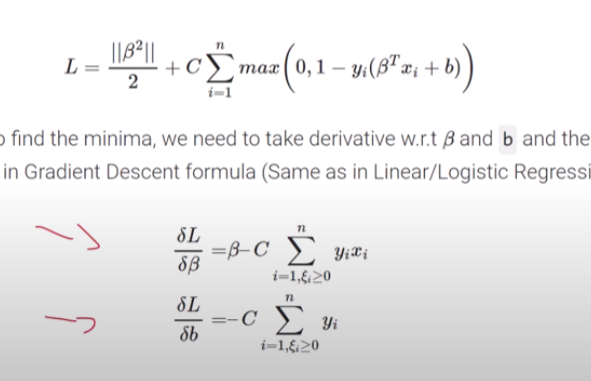

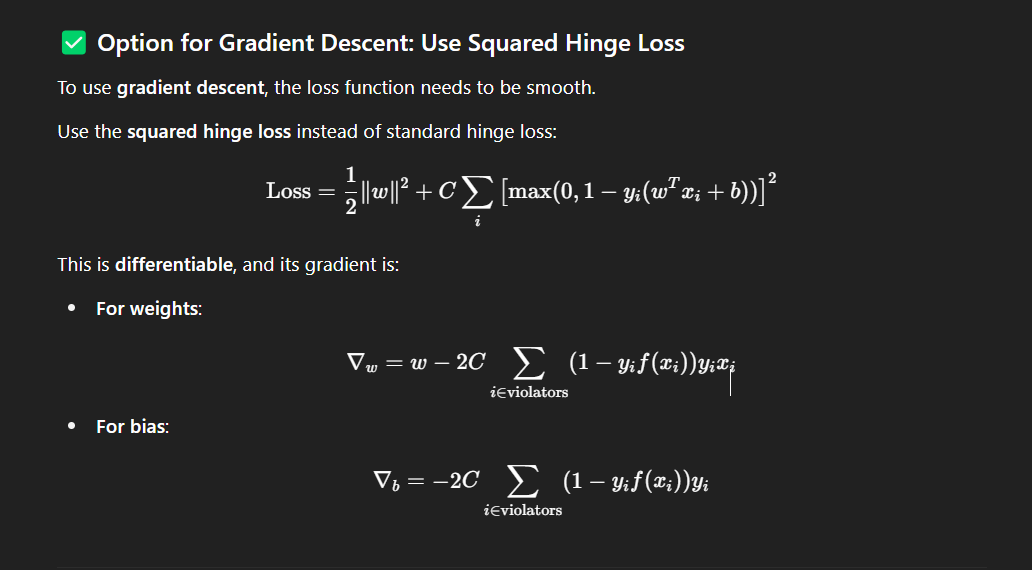

In [40]:
class LinearSVM():
  
  def __init__(self, learning_rate = 0.001, num_iterations = 1000, C = 1):
    self.learning_rate = learning_rate
    self.num_iterations = num_iterations
    self.C = C
    self.weights = None
    self.bias = 0

  def fit(self,x,y, optimization= 'sub-gradient'):

    x = np.array(x)
    y = np.array(y)

    num_samples, num_features = x.shape
    self.weights = np.zeros(num_features)

    if optimization == 'sub-gradient':
      for i in range(self.num_iterations):
        # sum yi xi
        condition = y * (x.dot(self.weights) + self.bias)
        index_missClassified = np.where(condition < 1)[0]

        # weights gradient 
        gradient_w = self.weights - self.C * y[index_missClassified].dot(x[index_missClassified])

        # weights update
        self.weights = self.weights - (self.learning_rate * gradient_w)

        # bias gradient
        gradient_b = -self.C * np.sum(y[index_missClassified])

        # bias update
        self.bias = self.bias - (self.learning_rate * gradient_b)

    elif optimization == 'gradient-decent':
        for i in range(self.num_iterations):
          # sum yi xi
          f_x = x.dot(self.weights) + self.bias
          condition = y * f_x
          index_missClassified = np.where(condition < 1)[0]

          margin = 1 - y[index_missClassified] * f_x[index_missClassified]

          # weights gradient 
          gradient_w = self.weights - 2 * self.C * ((margin * y[index_missClassified])[:, np.newaxis] * x[index_missClassified]).sum(axis=0)

          # weights update
          self.weights = self.weights - (self.learning_rate * gradient_w)

          # bias gradient
          gradient_b = -2 * self.C * np.sum(margin * y[index_missClassified])

          # bias update
          self.bias = self.bias - (self.learning_rate * gradient_b)

  def predict(self,x):
    location = x.dot(self.weights) + self.bias 
    return np.where(location >= 0, 1, -1)

  def score(self,x,y):
    prediction = self.predict(x)
    return f'{np.mean(prediction == y)*100}%'



In [41]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [42]:
df = pd.read_csv('./separable data.csv')
df.head()

,petal length (cm),petal width (cm),class
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [43]:
X = df.drop('class',axis=1).values
y = df['class'].values
y = np.where(y == 1, 1, -1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


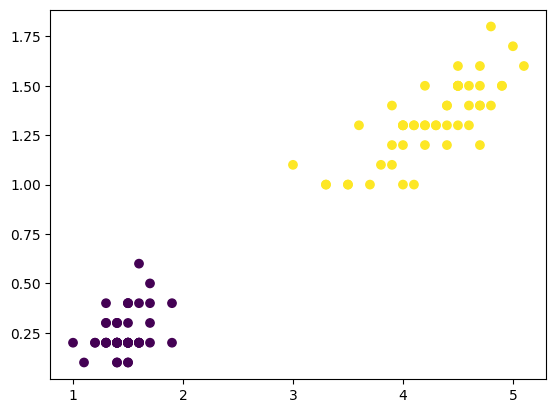

In [44]:
plt.scatter(X[:,0],X[:,1], c = y)


In [45]:
model = LinearSVM()

model.fit(X,y)
print(model.score(X,y))

100.0%


In [46]:
model.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

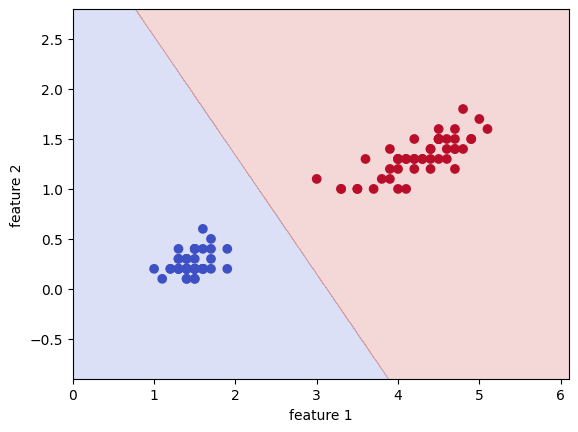

In [47]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.coolwarm)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 1000), np.linspace(y_min,y_max, 1000))

z = model.predict(np.c_[xx.flatten(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = .2, cmap = plt.cm.coolwarm)

In [48]:
df2 = pd.read_csv('./non separable data.csv')
df2

,Feature 1,Feature 2,Label
0,3.764052,2.400157,0.0
1,2.978738,4.240893,0.0
2,3.867558,1.022722,0.0
3,2.950088,1.848643,0.0
4,1.896781,2.410599,0.0
...,...,...,...
495,0.441033,0.178793,1.0
496,-0.799422,0.240788,1.0
497,0.289121,0.412871,1.0
498,-0.198399,0.094192,1.0


In [49]:
X = df2.drop('Label',axis=1).values
y = df2['Label'].values
y = np.where(y == 1, 1, -1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

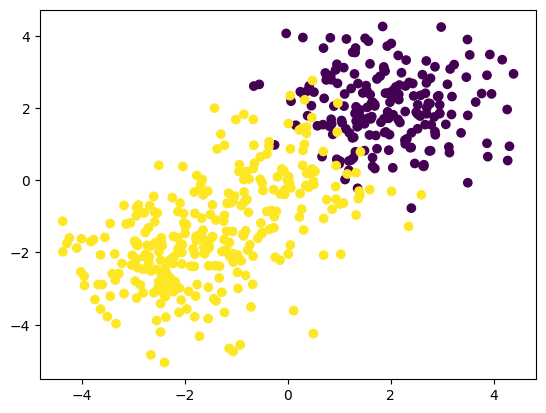

In [50]:
plt.scatter(X[:,0],X[:,1], c = y)


In [51]:
model = LinearSVM(C = 0.01)

model.fit(X,y)
print(model.score(X,y))

94.8%


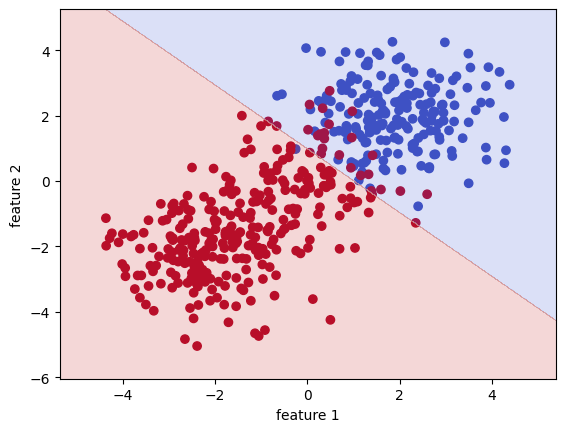

In [52]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap= plt.cm.coolwarm)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min,x_max, 1000), np.linspace(y_min,y_max, 1000))

z = model.predict(np.c_[xx.flatten(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha = .2, cmap = plt.cm.coolwarm)

In [53]:
df = pd.read_csv('../BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


    'crim': 'Crime rate per capita',
    'zn': 'Proportion of residential land zoned for large lots',
    'indus': 'Proportion of non-retail business acres per town',
    'chas': 'Charles River dummy variable (1 if tract bounds river, 0 otherwise)',
    'nox': 'Nitrogen oxides concentration (parts per 10 million)',
    'rm': 'Average number of rooms per dwelling',
    'age': 'Proportion of owner-occupied units built before 1940',
    'dis': 'Weighted distance to employment centers',
    'rad': 'Index of accessibility to radial highways',
    'tax': 'Property tax rate per $10,000',
    'ptratio': 'Pupil-teacher ratio by town',
    'b': 'Proportion of African American residents',
    'lstat': 'Percentage of lower status population',
    'medv': 'Median value of owner-occupied homes in $1000s'

In [54]:
# column_mapping = {
#     'crim': 'Crime rate per capita',
#     'zn': 'Proportion of residential land zoned for large lots',
#     'indus': 'Proportion of non-retail business acres per town',
#     'chas': 'Charles River dummy variable (1 if tract bounds river, 0 otherwise)',
#     'nox': 'Nitrogen oxides concentration (parts per 10 million)',
#     'rm': 'Average number of rooms per dwelling',
#     'age': 'Proportion of owner-occupied units built before 1940',
#     'dis': 'Weighted distance to employment centers',
#     'rad': 'Index of accessibility to radial highways',
#     'tax': 'Property tax rate per $10,000',
#     'ptratio': 'Pupil-teacher ratio by town',
#     'b': 'Proportion of African American residents',
#     'lstat': 'Percentage of lower status population',
#     'medv': 'Median value of owner-occupied homes in $1000s'
# }
# df.rename(columns=column_mapping, inplace=True)
# df

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [56]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [57]:
df.dropna(inplace=True)

In [58]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [61]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [62]:
correlation = df.corr()


In [63]:
correlation = df.corr()

fig = px.imshow(
    correlation,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    aspect='auto',
    title='Feature Correlation Heatmap'
)

fig.update_layout(
    width=900,
    height=800,
    margin=dict(l=50, r=50, t=50, b=50),
    coloraxis_colorbar=dict(title='Correlation'),
)

fig.show()


Distribution of Neighborhood Desirability:
desirability
0.0    250
1.0    246
Name: count, dtype: int64
Percentage of High Desirability (1): 49.60%


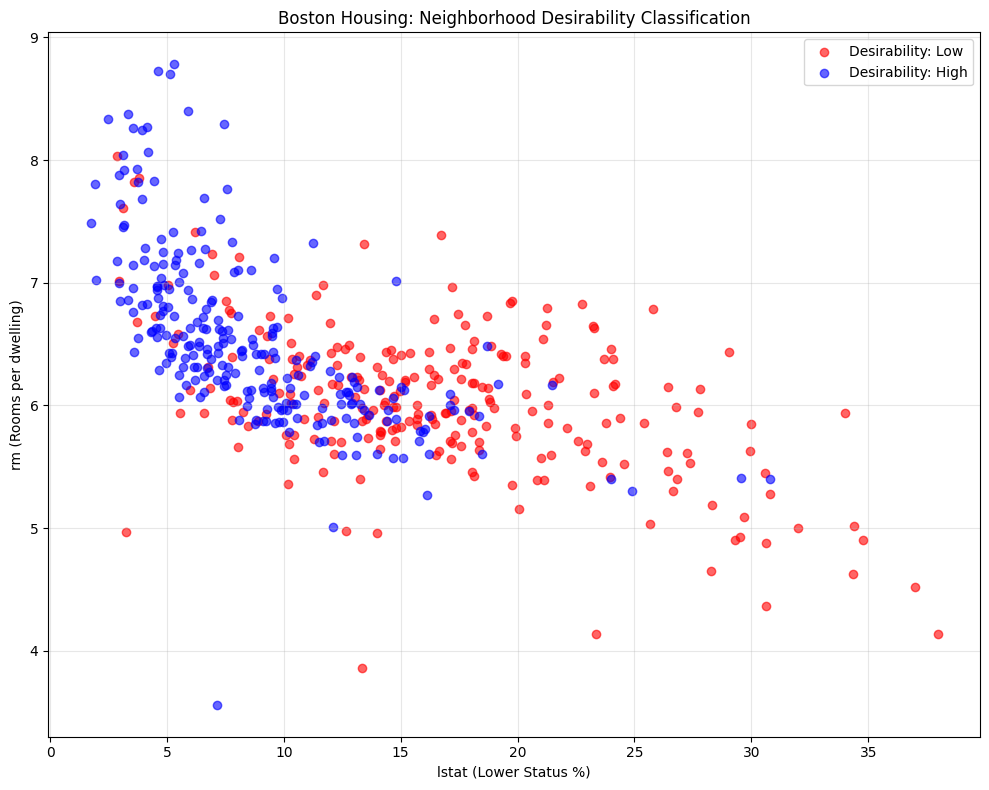


Feature correlation with Neighborhood Desirability:
desirability    1.000000
tax             0.589465
indus           0.584177
lstat           0.553242
nox             0.548895
rad             0.537858
ptratio         0.531247
age             0.484638
dis             0.476481
medv            0.464844
crim            0.375103
rm              0.349416
zn              0.326603
b               0.305438
chas            0.120314
Name: desirability, dtype: float64


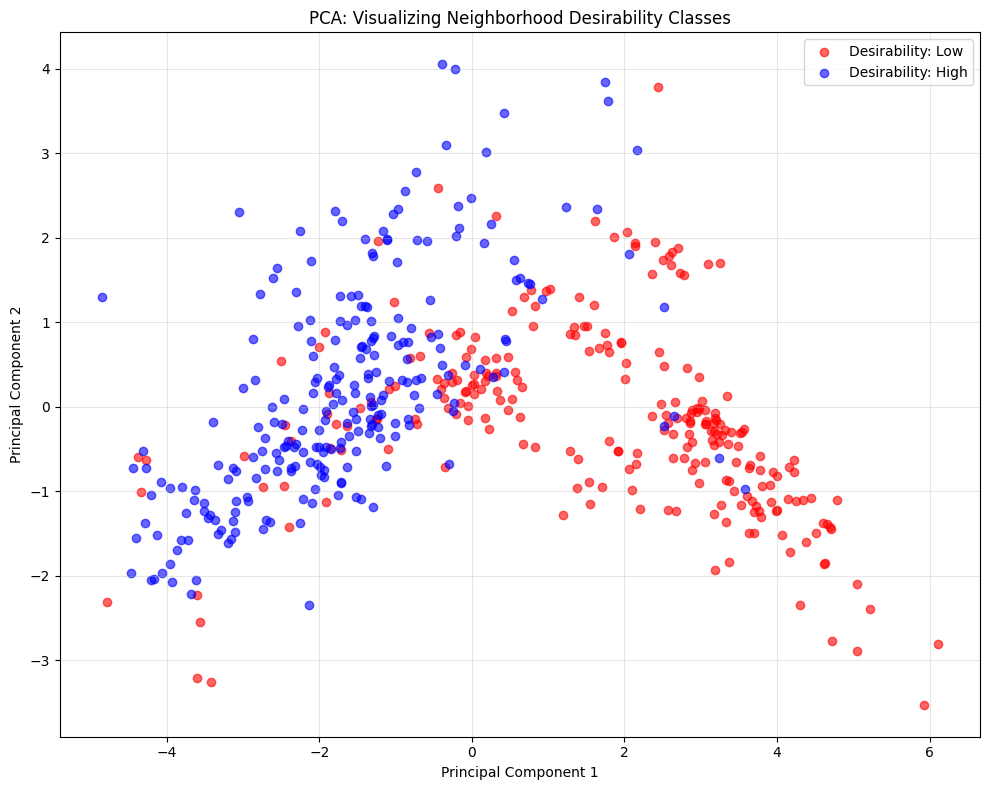


PCA explained variance ratio:
[0.47222062 0.11033154]
Total explained variance: 58.26%

Feature contributions to PCA components:
         crim        zn     indus      chas       nox        rm       age  \
PC1  0.250715 -0.256524  0.346568  0.004671  0.342332 -0.189216  0.313924   
PC2 -0.310063 -0.317618  0.112247  0.460619  0.222244  0.160748  0.310343   

          dis       rad       tax   ptratio         b     lstat  
PC1 -0.321718  0.320065  0.338051  0.205428 -0.202681  0.310100  
PC2 -0.350417 -0.264574 -0.235436 -0.312919  0.232503 -0.080426  

Average house value for high desirability neighborhoods: $26.92K
Average house value for low desirability neighborhoods: $18.32K
Difference: $8.61K


In [65]:
features_for_quality = [
    'lstat',  # Percentage of lower status population
    'rm',     # Average number of rooms per dwelling
    'nox',    # Nitrogen oxides concentration
    'dis',    # Weighted distance to employment centers
    'ptratio',# Pupil-teacher ratio by town
    'crim'    # Crime rate per capita
]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_quality])
scaled_df = pd.DataFrame(scaled_features, columns=features_for_quality)

# Feature weights based on correlation strength with 'medv' (median home value)
feature_weights = {
    'lstat': -0.74,
    'rm': 0.70,
    'nox': -0.43,
    'dis': 0.25,
    'ptratio': -0.51,
    'crim': -0.39
}

# Apply weights
for col in feature_weights:
    scaled_df[col] = scaled_df[col] * feature_weights[col]

# Compute weighted desirability score
scaled_df['desirability_score'] = scaled_df.sum(axis=1)

# Create binary classification target
threshold = scaled_df['desirability_score'].median()
df['desirability'] = (scaled_df['desirability_score'] > threshold).astype(int)

# Distribution of classes
print("\nDistribution of Neighborhood Desirability:")
print(df['desirability'].value_counts())
print(f"Percentage of High Desirability (1): {df['desirability'].mean()*100:.2f}%")

# Scatter plot using the two most significant features
plt.figure(figsize=(10, 8))
colors = {0: 'red', 1: 'blue'}

for desirability, color in colors.items():
    subset = df[df['desirability'] == desirability]
    plt.scatter(subset['lstat'], 
                subset['rm'], 
                c=color, 
                label=f"Desirability: {'High' if desirability==1 else 'Low'}", 
                alpha=0.6)

plt.xlabel('lstat (Lower Status %)')
plt.ylabel('rm (Rooms per dwelling)')
plt.title('Boston Housing: Neighborhood Desirability Classification')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Correlation with new target
correlation_with_desirability = df.corr()['desirability'].abs().sort_values(ascending=False)
print("\nFeature correlation with Neighborhood Desirability:")
print(correlation_with_desirability)

# PCA Visualization
pca = PCA(n_components=2)
features_for_pca = [col for col in df.columns if col not in ['desirability', 'medv']]
pca_result = pca.fit_transform(scaler.fit_transform(df[features_for_pca]))

plt.figure(figsize=(10, 8))
for desirability, color in colors.items():
    mask = df['desirability'] == desirability
    plt.scatter(pca_result[mask, 0], 
                pca_result[mask, 1], 
                c=color, 
                label=f"Desirability: {'High' if desirability==1 else 'Low'}", 
                alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Visualizing Neighborhood Desirability Classes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# PCA analysis
print("\nPCA explained variance ratio:")
print(pca.explained_variance_ratio_)
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)*100:.2f}%")

print("\nFeature contributions to PCA components:")
pca_components = pd.DataFrame(
    pca.components_,
    columns=features_for_pca,
    index=['PC1', 'PC2']
)
print(pca_components)

# Desirability vs. Median Home Value
high_desirability_median = df[df['desirability'] == 1]['medv'].mean()
low_desirability_median = df[df['desirability'] == 0]['medv'].mean()

print(f"\nAverage house value for high desirability neighborhoods: ${high_desirability_median:.2f}K")
print(f"Average house value for low desirability neighborhoods: ${low_desirability_median:.2f}K")
print(f"Difference: ${high_desirability_median - low_desirability_median:.2f}K")

In [66]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,desirability
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1.0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1.0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,NaN
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,NaN
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,NaN
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,NaN


In [67]:
df[['desirability']].value_counts()

desirability
0.0             250
1.0             246
Name: count, dtype: int64

In [68]:
y = df['desirability']
y = np.where(y == 1, 1, -1)
print(y)

[ 1  1  1  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1
  1  1 -1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  1
  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1

In [69]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv', 'desirability'],
      dtype='object')

In [73]:
X = df[['lstat', 'rm', 'nox', 'ptratio']]


In [ ]:
model = LinearSVM(C = 0.0018)
model.fit(X,y, optimization= 'gradient-decent')
print(model.score(X,y))


77.44510978043913%


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

SVM accuracy on PCA-transformed features: 81.23752495009981%
PCA explained variance ratio: [0.56335181 0.21128485]
Total explained variance: 77.46%

Feature contributions to PCA components:
        lstat        rm       nox   ptratio
PC1  0.595479 -0.518829  0.466457  0.398295
PC2  0.168724  0.189425  0.625393 -0.737925


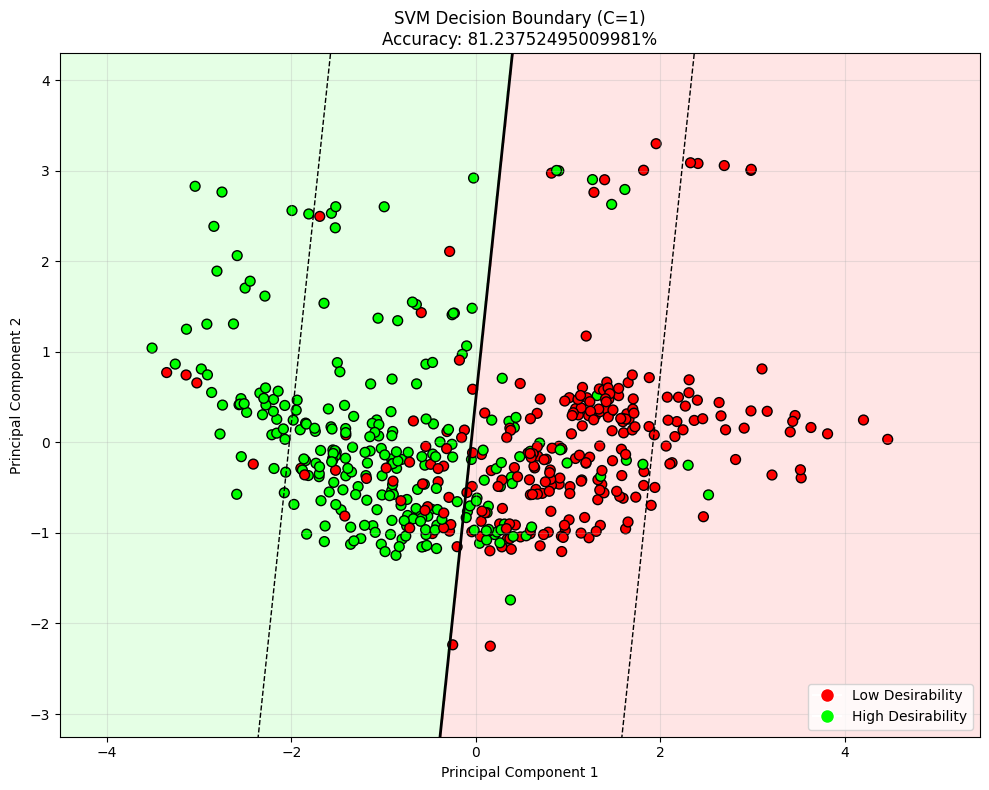

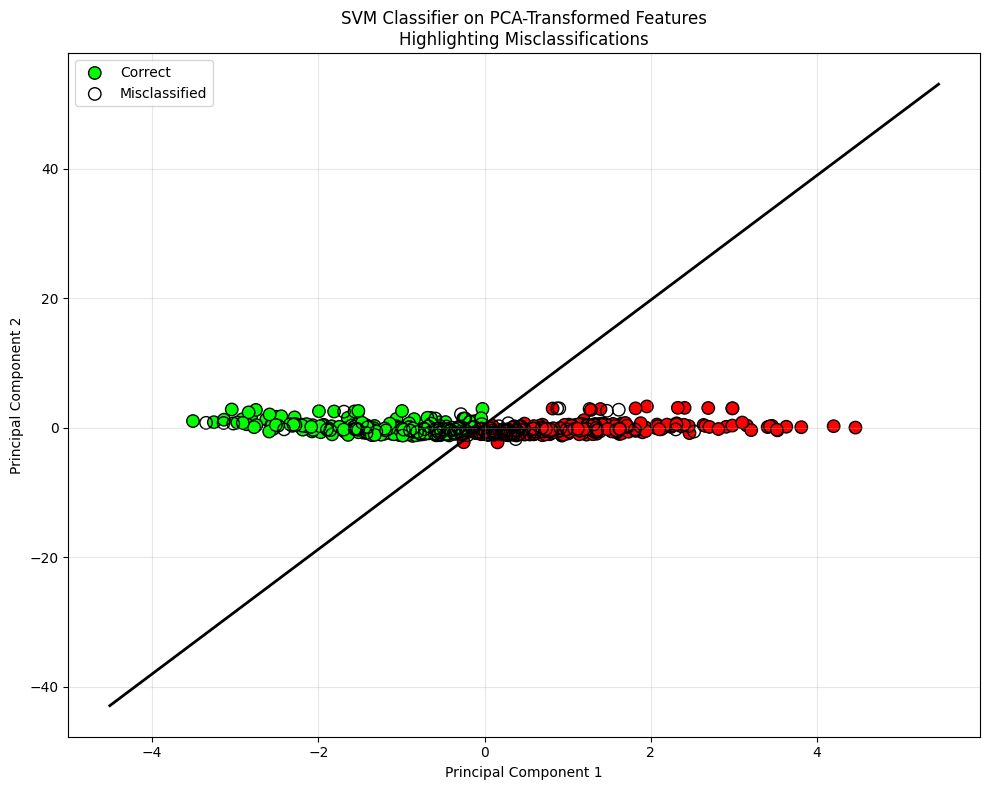

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Use the four specific original feature names
selected_features = [
    'lstat',  # Percentage of lower status population
    'rm',     # Average number of rooms per dwelling
    'nox',    # Nitrogen oxides concentration
    'ptratio' # Pupil-teacher ratio
]

# Extract the selected features
X = df[selected_features]

# Apply PCA to reduce to 2D for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame for easier handling
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Train SVM on PCA features
svm_pca = LinearSVM(C=1, num_iterations=10000)
svm_pca.fit(X_pca_df, y, optimization='gradient-decent')

# Display accuracy on PCA-transformed data
accuracy = svm_pca.score(X_pca_df, y)
print(f"SVM accuracy on PCA-transformed features: {accuracy}")

# Display explained variance of PCA components
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

# Get feature importances from PCA
feature_importance = pd.DataFrame(
    pca.components_,
    columns=selected_features,
    index=['PC1', 'PC2']
)
print("\nFeature contributions to PCA components:")
print(feature_importance)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, feature1_name, feature2_name):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.3)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)

    w = model.weights
    b = model.bias
    hyperplane = lambda x: (-w[0] * x - b) / w[1]
    plt.plot([x_min, x_max], [hyperplane(x_min), hyperplane(x_max)], 'k-', linewidth=2)

    margin_plus = lambda x: (-w[0] * x - b + 1) / w[1]
    margin_minus = lambda x: (-w[0] * x - b - 1) / w[1]
    plt.plot([x_min, x_max], [margin_plus(x_min), margin_plus(x_max)], 'k--', linewidth=1)
    plt.plot([x_min, x_max], [margin_minus(x_min), margin_minus(x_max)], 'k--', linewidth=1)

    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(f'SVM Decision Boundary (C={model.C})\nAccuracy: {model.score(X, y)}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True, alpha=0.3)

    legend_labels = {-1: 'Low Desirability', 1: 'High Desirability'}
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10)
               for c in ['#FF0000', '#00FF00']]
    plt.legend(handles, legend_labels.values(), loc='lower right')

    plt.tight_layout()
    plt.show()

# Plot the decision boundary on PCA-transformed features
plot_decision_boundary(X_pca_df, y, svm_pca, 'Principal Component 1', 'Principal Component 2')

# Additional: Plot the original data points in the PCA space colored by prediction
predictions = svm_pca.predict(X_pca_df)
misclassified = (predictions != y)

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[~misclassified, 0], X_pca[~misclassified, 1],
            c=y[~misclassified], cmap=ListedColormap(['#FF0000', '#00FF00']),
            marker='o', edgecolor='k', s=80, label='Correct')
plt.scatter(X_pca[misclassified, 0], X_pca[misclassified, 1],
            facecolors='none', edgecolor='k', s=80, marker='o', label='Misclassified')

w = svm_pca.weights
b = svm_pca.bias
hyperplane = lambda x: (-w[0] * x - b) / w[1]
x_min, x_max = X_pca_df['PC1'].min() - 1, X_pca_df['PC1'].max() + 1
plt.plot([x_min, x_max], [hyperplane(x_min), hyperplane(x_max)], 'k-', linewidth=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Classifier on PCA-Transformed Features\nHighlighting Misclassifications')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def grid_search_svm(X, y, C_values, optimization='sub-gradient', learning_rate=0.001, num_iterations=1000, test_size=0.2):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    best_score = 0
    best_model = None
    best_C = None

    for C in C_values:
        model = LinearSVM(learning_rate=learning_rate, num_iterations=num_iterations, C=C)
        model.fit(X_train, y_train, optimization=optimization)
        predictions = model.predict(X_val)
        score = accuracy_score(y_val, predictions)

        print(f"C={C}, Accuracy={score*100:.2f}%")

        if score > best_score:
            best_score = score
            best_model = model
            best_C = C

    print(f"\nBest C: {best_C} with Accuracy: {best_score*100:.2f}%")
    return best_model, best_C


In [72]:
C_values = [0.01, 0.1, 1, 10, 100]

best_model, best_C = grid_search_svm(X, y, C_values, optimization='sub-gradient')


C=0.01, Accuracy=84.16%
C=0.1, Accuracy=76.24%
C=1, Accuracy=75.25%
C=10, Accuracy=75.25%
C=100, Accuracy=74.26%

Best C: 0.01 with Accuracy: 84.16%
